Original class distribution: {0: 7729, 1: 271}
Resampled class distribution: {0: 7729, 1: 7729}

--- Classification Report ---
              precision    recall  f1-score   support

           0       0.99      0.97      0.98      1932
           1       0.47      0.72      0.57        68

    accuracy                           0.96      2000
   macro avg       0.73      0.85      0.77      2000
weighted avg       0.97      0.96      0.97      2000



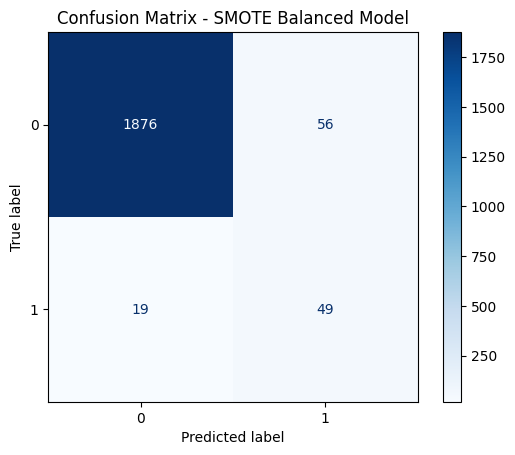

File 'balanced_ai4i2020.csv' has been exported successfully.


In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt

# 1. Load the dataset
df = pd.read_csv('ai4i2020.csv')

# 2. Preprocessing
# Drop non-informative IDs and specific failure types to prevent data leakage
X = df.drop(['UDI', 'Product ID', 'Machine failure', 'TWF', 'HDF', 'PWF', 'OSF', 'RNF'], axis=1)
y = df['Machine failure']

# Encode the categorical 'Type' column
X = pd.get_dummies(X, columns=['Type'], drop_first=True)

# 3. Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# 4. Applying SMOTE to balance the training data
smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X_train, y_train)

print(f"Original class distribution: {y_train.value_counts().to_dict()}")
print(f"Resampled class distribution: {y_res.value_counts().to_dict()}")

# 5. Training model with balanced data
rf_balanced = RandomForestClassifier(n_estimators=100, random_state=42)
rf_balanced.fit(X_res, y_res)

# 6. Predict and Evaluate
y_pred = rf_balanced.predict(X_test)

print("\n--- Classification Report ---")
print(classification_report(y_test, y_pred))

# 7. Visualize Results
disp = ConfusionMatrixDisplay.from_estimator(rf_balanced, X_test, y_test, cmap=plt.cm.Blues)
plt.title("Confusion Matrix - SMOTE Balanced Model")
plt.show()
df_balanced = pd.DataFrame(X_res, columns=X.columns)
df_balanced['Machine failure'] = y_res

# Export to CSV
df_balanced.to_csv('balanced_ai4i2020.csv', index=False)
print("File 'balanced_ai4i2020.csv' has been exported successfully.")